In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# NBER recessions
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

In [2]:
import theano

In [5]:
import pymc3 as pm

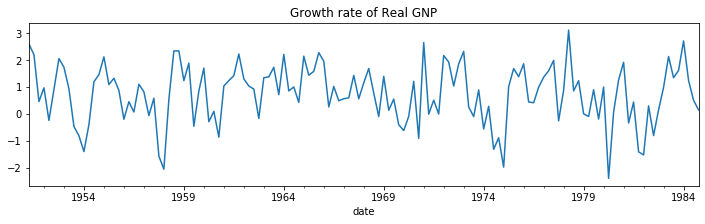

In [11]:
# Get the RGNP data to replicate Hamilton
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

# Plot the data
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(12,3))

# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

In [12]:
timeseries = dta_hamilton.values

In [33]:
Y = timeseries[4:]

In [34]:
X = np.concatenate([[timeseries[3:-1]], [timeseries[2:-2]], [timeseries[1:-3]], [timeseries[0:-4]]], axis=0)

In [44]:
k_regimes = 2
T, lag = X.shape

In [45]:
a = [[1,1], [2,3]]

In [46]:
pm.math.log

In [9]:
with pm.Model() as model:
    ps = [pm.Uniform('p%d'%i, upper= 10**2, lower= -(10**2)  for i in range(k_regimes)]
    
    consts = [pm.Normal('const %d'%i, mu=0, sd=1000) for i in range(k_regimes)]
    phis = [pm.Normal('phi %d'%i, mu=0, sd=1000) for i in range(lag)]
    sigmas = [pm.InverseGamma('const %d'%i, mu=0, sd=1000) for i in range(k_regimes)]
    
    past_probs = [ps[i]  for i in range(k_regimes)]
    probs = [past_probs]

    Fs = []
    
    def calc_model(fs, xs, k_regimes, lag, prob, depth=0):
        x = xs[-depth]
        phi = phis[depth]
        for k in range(k_regimes):
            elif depth < lag:
                if depth == 0:
                    linear_model = consts[k]
                else:
                    linear_model += phi*(x - consts[k])
                depth += 1
                return calc_model(linear_model, xs, k_regimes, lag, depth)
            else:
                fs.append(prob[][]*linear_model)
                
    def calc_prob(fs, xs, k_regimes, lag, prob, depth=0):
    
    def likelifood_func(consts):
        
        
        fs = []
    
        for t in range(4, T):
            xs = X[t]
            calc_model(fs, xs, k_regimes, lag, prob, depth=0)
            
            
            
            for k in range(k_regimes):
                if k == 0:
                    linear_model = consts[k]
                    
                else:
                    
                
                for k1 in 
            
            

            for k in range(k_regimes):
                linear_model = consts[k]


                for d in range(np.min(dim, i)):
                    linear_model += probs[-d-2][k]*pymc.Lambda('linear_regression', lambda x=X[t, d], mu=consts[k]: x - mu) 

                Fdts = []
                for k in range(k_regimes):
                    if k == 0:
                        linear_model = probs[-d][k]*pymc.Lambda('linear_regression', lambda x=X[t, d], mu=consts[k]: x - mu) 
                        denom = 
                    else:
                        linear_model += probs[-d][k]*pymc.Lambda('linear_regression', lambda x=X[t, d], mu=consts[k]: x - mu)
                    Fdts.append(pm.Normal('fkt', mu=linear_model, sd=sigmas[k]))



                    f_ytk = pm.Normal('fkt', mu=linear_model, sd=sigmas[k])
                    f_ytk = f_ytk*probs[-1][k]

                    F_yt_s.append(f_ytk)

                for k in range(k_regimes):
                    if k == 0:
                        f_yt = F_yt_s[k]
                    else:
                        f_yt += F_yt_s[k]

                next_probs = []
                for k in range(k_regimes):
                    next_probs.append( F_yt_s[k]/denom)

                probs.append(next_probs)
                
                if t == 0:
                    likelihood = pm.math.log(f_yt)
                else:
                    likelihood += pm.math.log(f_yt)
    
    like = pm.Potential('like', likelifood_func(theta_1,theta_2))
    
    start = pm.find_MAP(model = model)
    step = pm.Metropolis()
    trace = pm.sample(50000, step = step,start=start)
    
pm.traceplot(trace)

KeyboardInterrupt: 